In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load dataset

df = pd.read_csv("spambase_csv.csv")
print(df.shape)
print(df.head())
print(df.describe())


(4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00  

In [ ]:
#Missing Values

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
#Target

print(df['class'].nunique())
print(df['class'].unique())


2
[1 0]


In [ ]:
#To replace Nan with mode for Categorical feature
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
#Encoding for Cayegorical feature
df_encoded = pd.get_dummies(df, columns=df.columns, drop_first=False)


In [ ]:
#Duplicate
df.duplicated().sum()

np.int64(391)

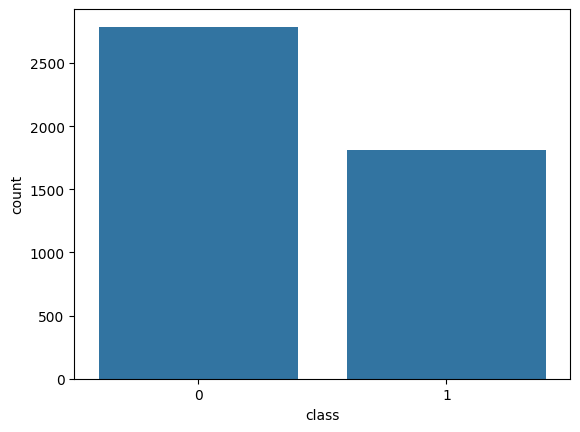

<Axes: ylabel='count'>

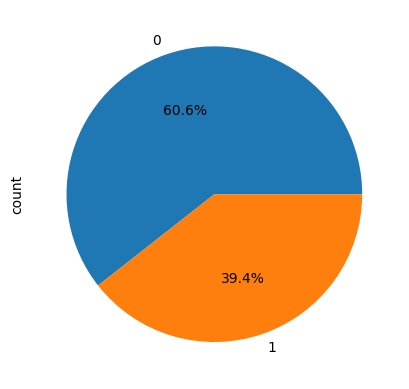

In [ ]:
#target Class Distribution

sns.countplot(x='class', data=df)
plt.show()
df['class'].value_counts().plot.pie(autopct='%1.1f%%')


In [ ]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


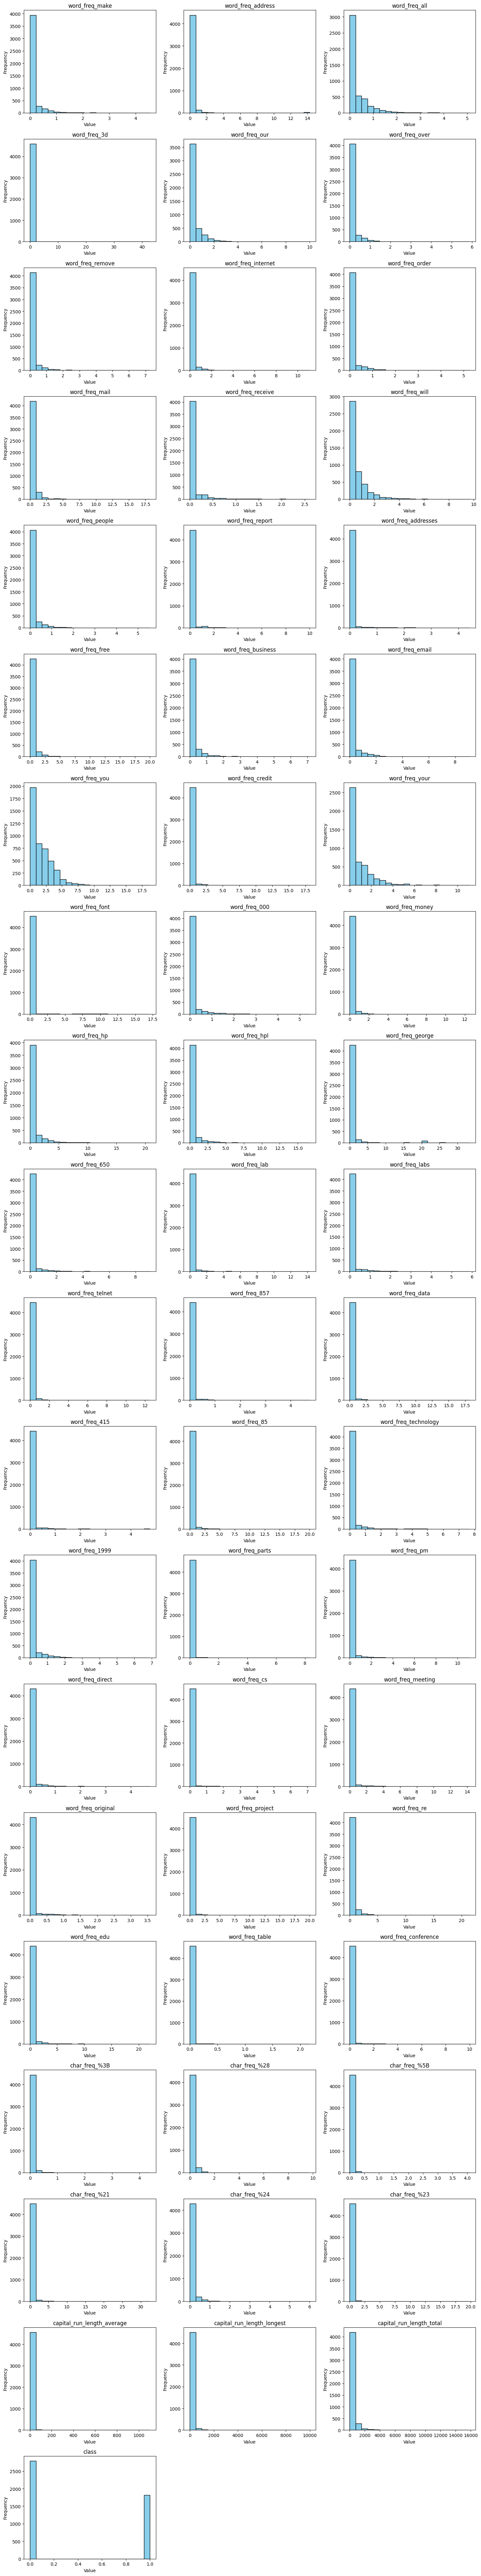

In [ ]:
#Numeric Features
#Histogram

num_cols = len(df.columns)


n_cols = 3
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel('Value')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

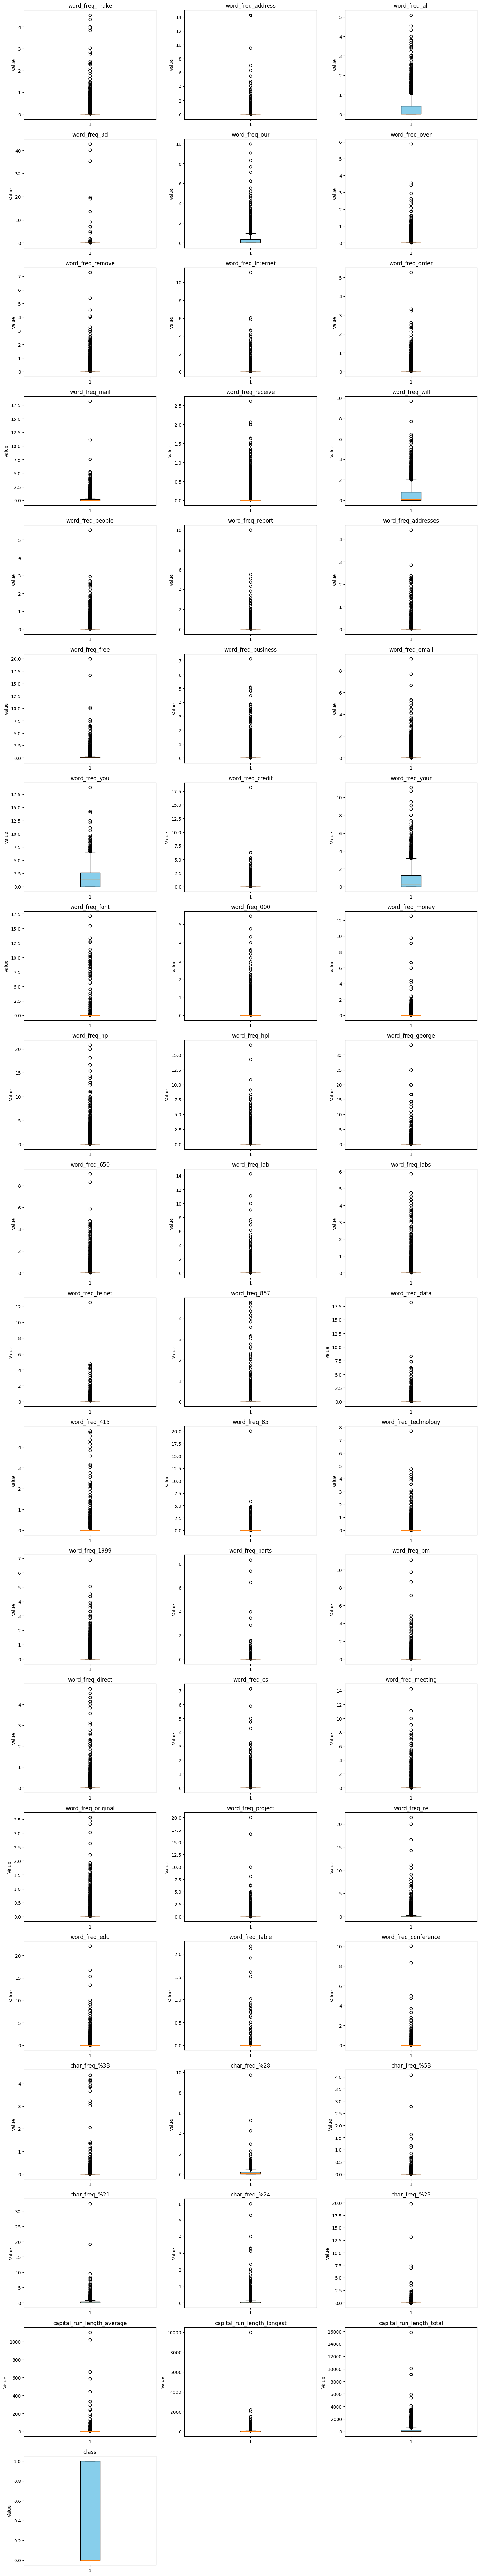

In [ ]:
#Boxplot

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numeric_cols)

# Define subplot grid size
n_cols = 3  # number of plots per row
n_rows = (num_cols + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Plot boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='skyblue'))
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='word_freq_make', ylabel='count'>

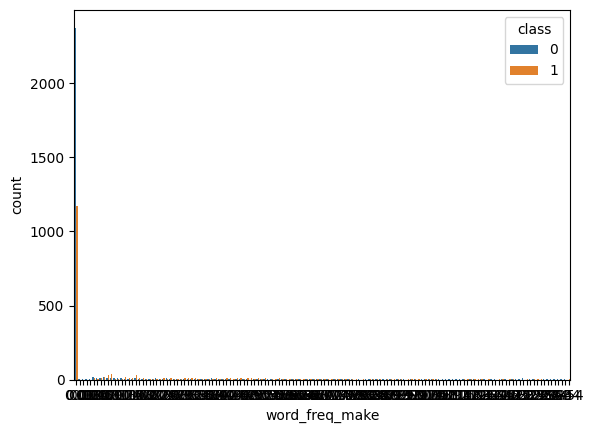

In [ ]:
#Categorical feature
#Bar plot

sns.countplot(x='word_freq_make', hue='class', data=df)


<Axes: ylabel='class'>

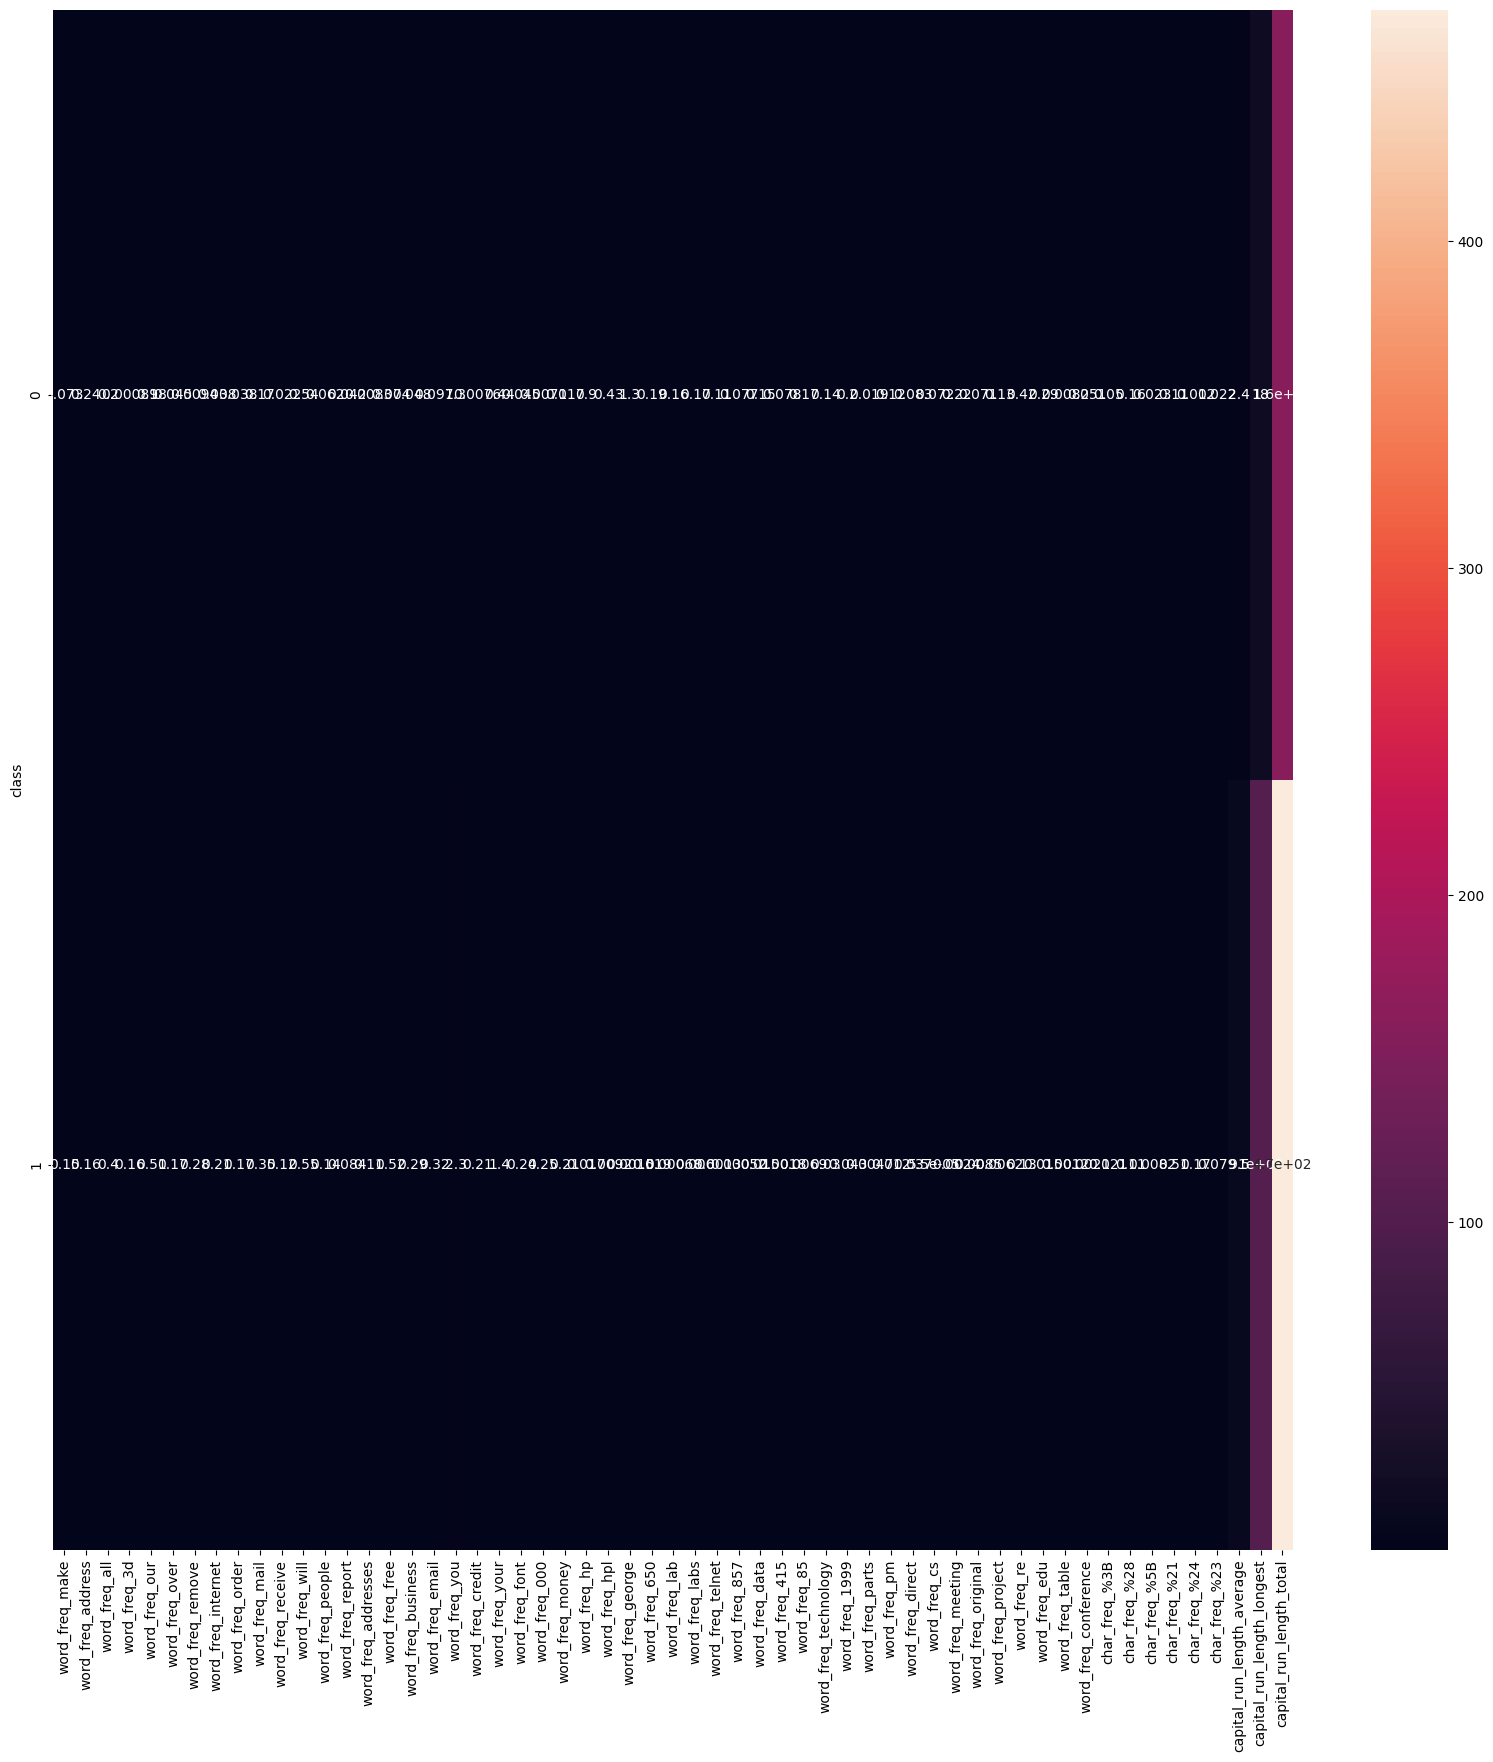

In [ ]:
#Feature vs target relation
#HeattMap

plt.figure(figsize=(20,20))
sns.heatmap(df.groupby('class').mean(), annot=True)

<Axes: >

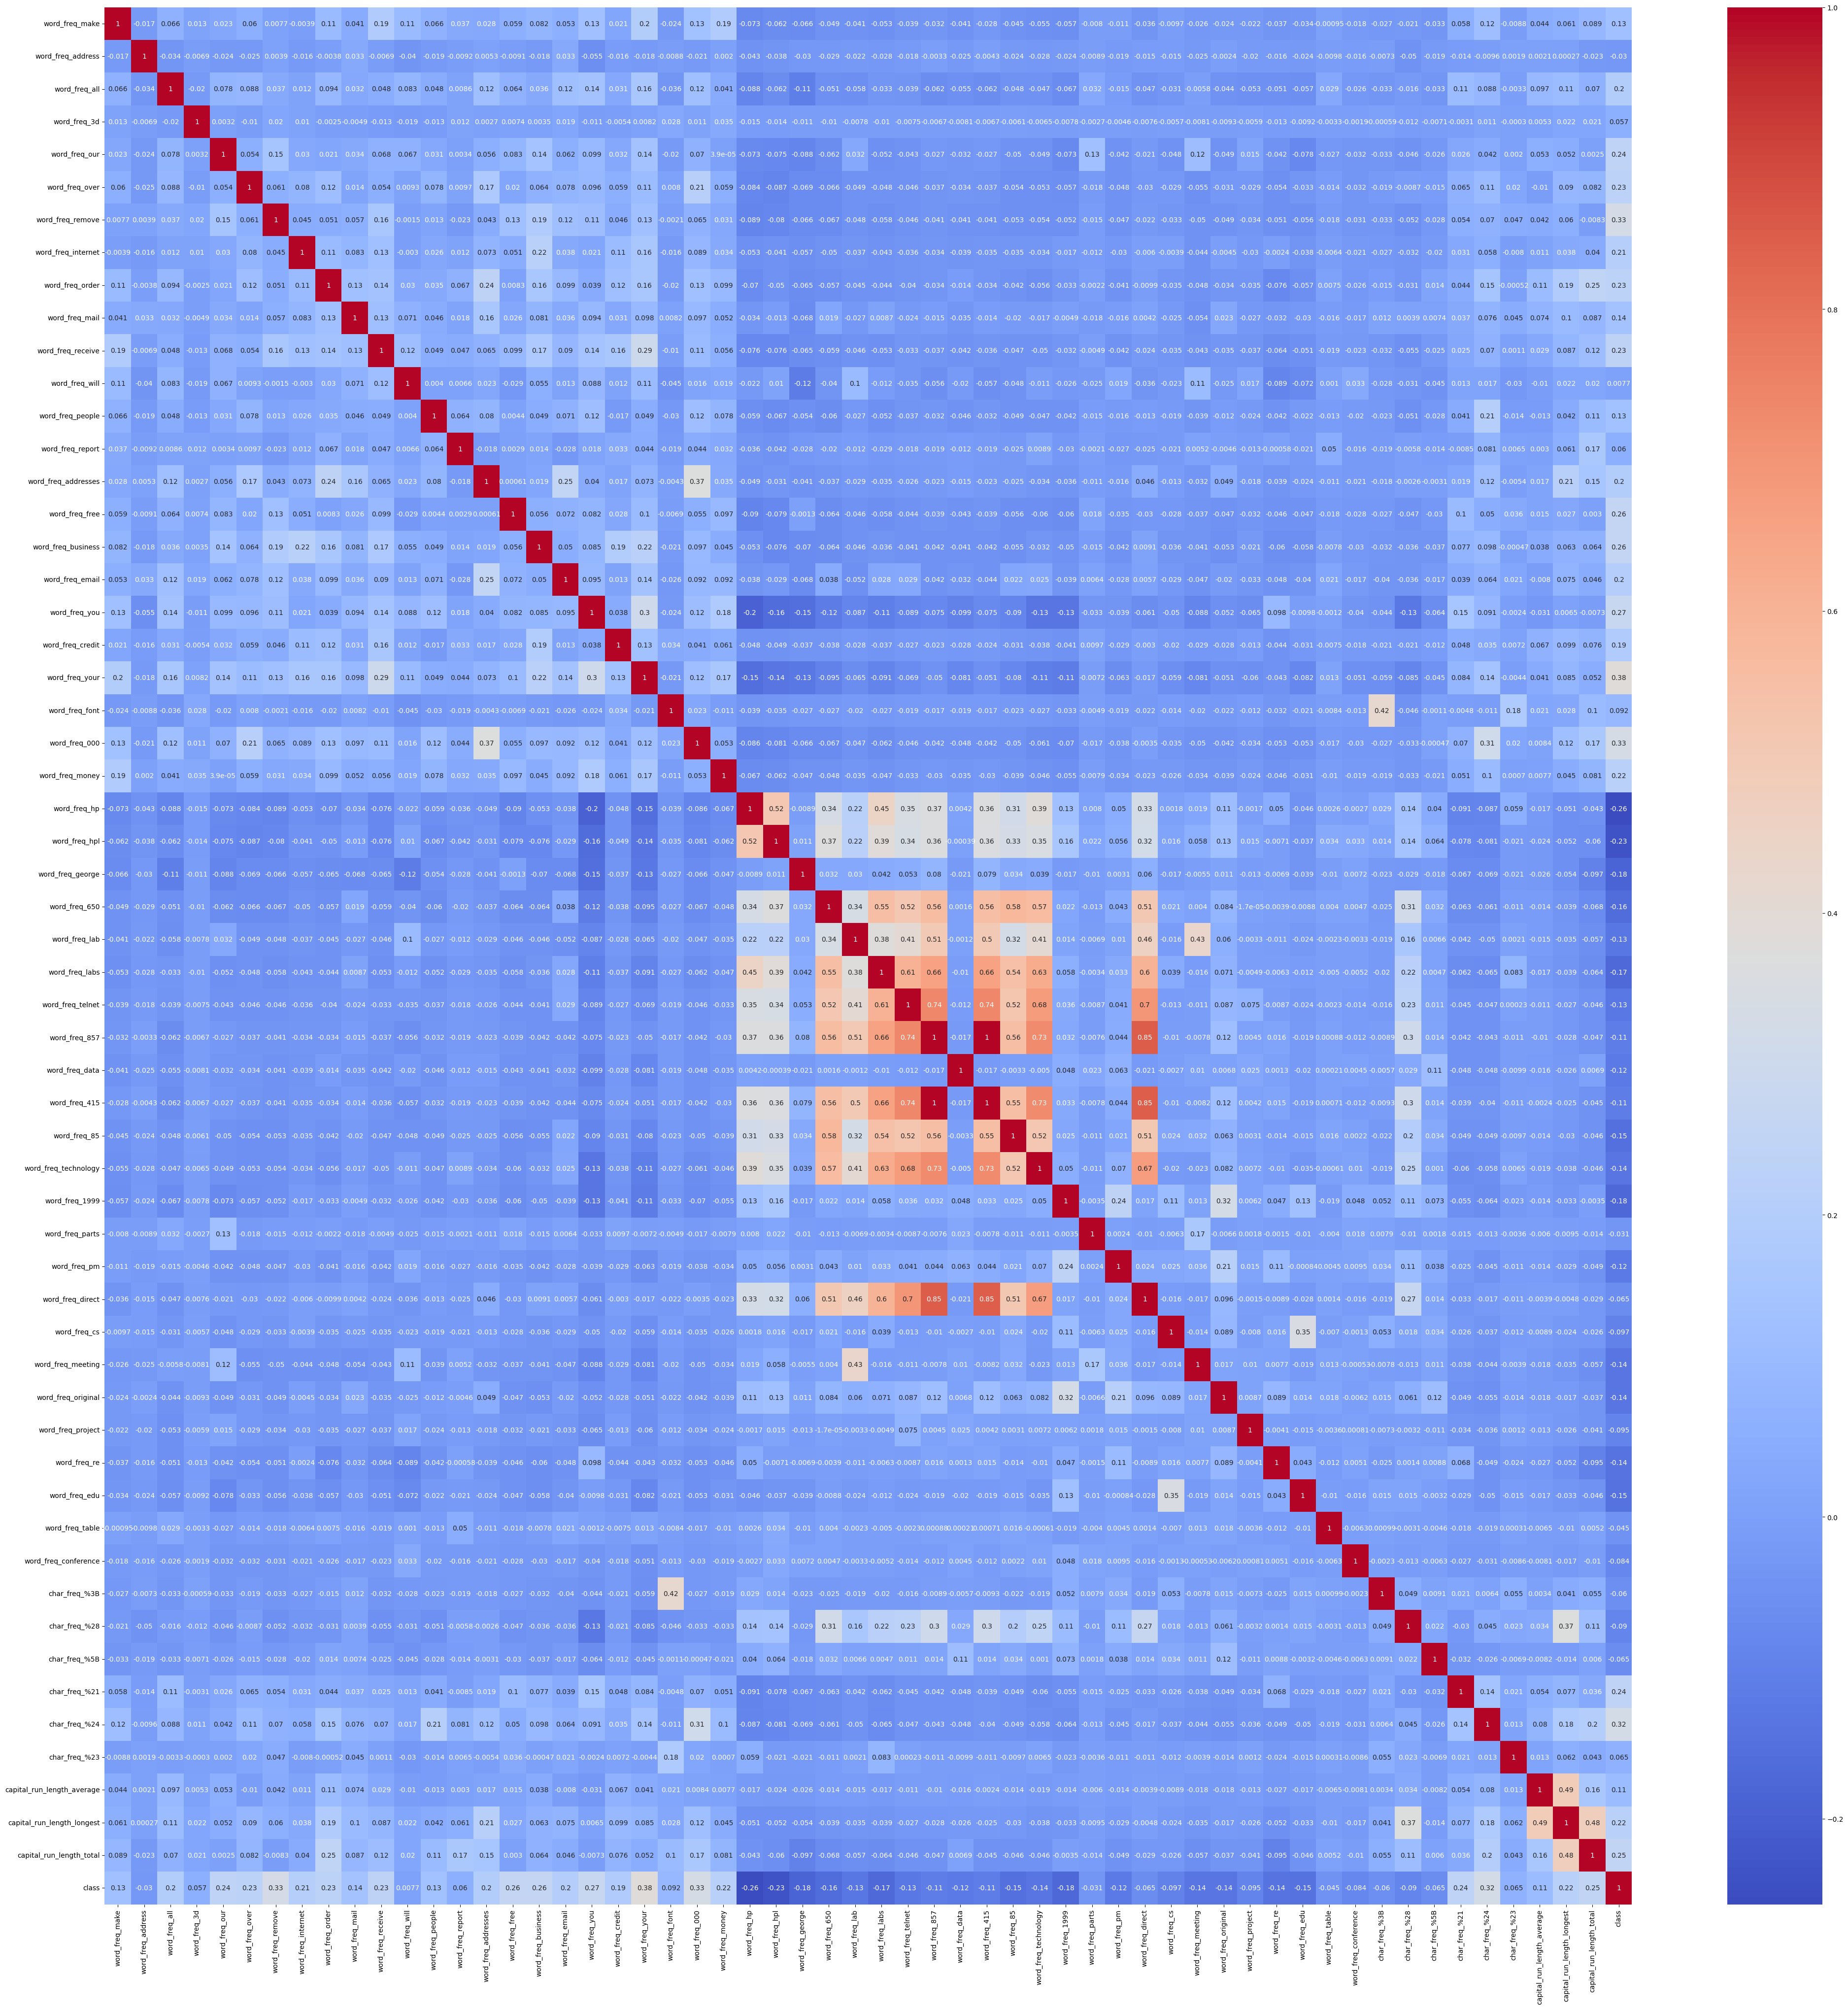

In [ ]:
#Correlation Heatmap

plt.figure(figsize=(50,50))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [ ]:
#Standardization

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

df= pd.concat([X_scaled, y], axis=1)

print(df.head())


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342434           0.330885       0.712859       -0.0469   
1        0.345359           0.051909       0.435130       -0.0469   
2       -0.145921          -0.165072       0.851723       -0.0469   
3       -0.342434          -0.165072      -0.556761       -0.0469   
4       -0.342434          -0.165072      -0.556761       -0.0469   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011565       -0.350266         -0.291794           -0.262562   
1      -0.256117        0.672399          0.244743           -0.088010   
2       1.364846        0.343685          0.193644            0.036670   
3       0.472573       -0.350266          0.500237            1.308402   
4       0.472573       -0.350266          0.500237            1.308402   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0        -0.323302       -0.371364  ...      -0.158453      -0.5143

In [ ]:
print(df.head())
df['class'].unique()

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0       -0.342434           0.330885       0.712859       -0.0469   
1        0.345359           0.051909       0.435130       -0.0469   
2       -0.145921          -0.165072       0.851723       -0.0469   
3       -0.342434          -0.165072      -0.556761       -0.0469   
4       -0.342434          -0.165072      -0.556761       -0.0469   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       0.011565       -0.350266         -0.291794           -0.262562   
1      -0.256117        0.672399          0.244743           -0.088010   
2       1.364846        0.343685          0.193644            0.036670   
3       0.472573       -0.350266          0.500237            1.308402   
4       0.472573       -0.350266          0.500237            1.308402   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0        -0.323302       -0.371364  ...      -0.158453      -0.5143

array([1, 0])

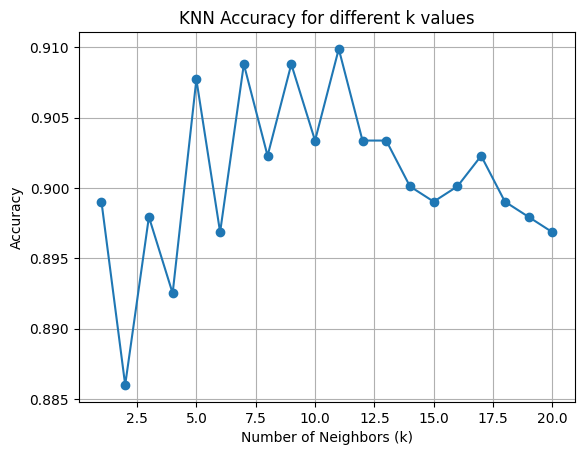

Best k = 11, Accuracy = 0.9099


In [ ]:
#Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# -------------------------
# 1. Data Preprocessing
# -------------------------
X = df.drop('class', axis=1)
y = df['class']

# -------------------------
# 2. Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# -------------------------
# 3. Feature Scaling
# -------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------
# 4. KNN for varying k
# -------------------------
k_values = range(1, 21)  # vary k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# -------------------------
# 5. Plot accuracy vs k
# -------------------------
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different k values')
plt.grid(True)
plt.show()

# -------------------------
# 6. Best k
# -------------------------
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k = {best_k}, Accuracy = {max(accuracies):.4f}")


In [ ]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


Precision: 0.8861
Recall:    0.8788
F1 Score:  0.8824


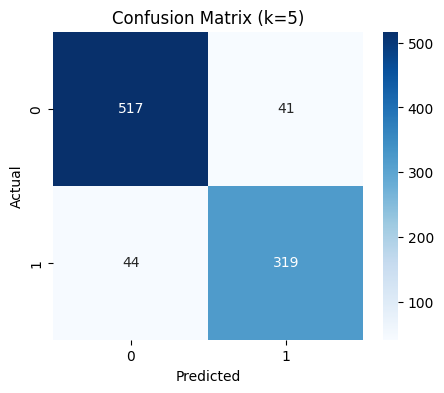

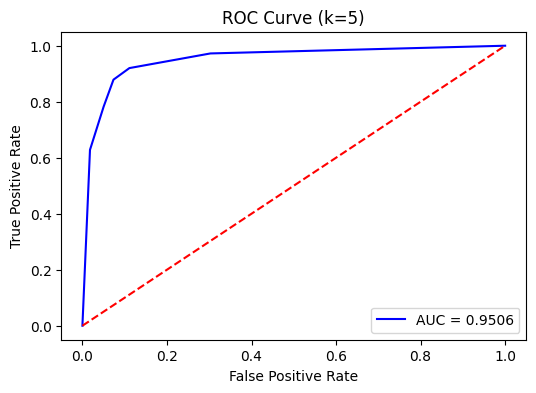

In [ ]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for ROC

# ===============================
# 6. Metrics
# ===============================
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ===============================
# 7. Confusion Matrix
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (k={k})')
plt.show()

# ===============================
# 8. ROC Curve
# ===============================
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (k={k})')
plt.legend()
plt.show()
